In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import eig
%matplotlib inline

Creation of Data

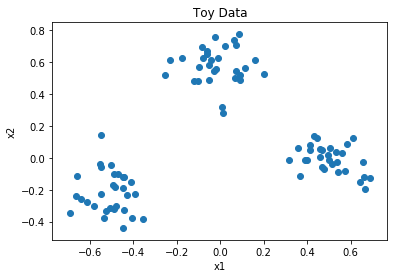

In [2]:
std = 0.1
means = np.array([[-0.5, -0.2], [0, 0.6], [0.5, 0]])

num_samples_per_mean = 30
num_samples = len(means) * num_samples_per_mean

x = np.vstack([np.random.normal(mean, std, size=[num_samples_per_mean, 2]) for mean in means])

plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Toy Data')
plt.show()

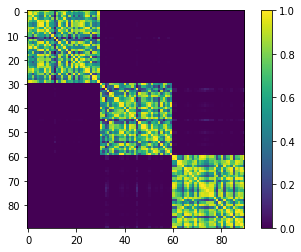

In [3]:
def rbf_kernel(x, x_dash, sigma=1):
    return np.exp(-np.linalg.norm(x - x_dash)**2 / (2 * sigma**2))

kernel_matrix = np.zeros((num_samples, num_samples))

for (i, j), value in np.ndenumerate(kernel_matrix):
    kernel_matrix[i, j] = rbf_kernel(x[i], x[j], sigma=0.2)
    
plt.imshow(kernel_matrix, interpolation='none')
plt.colorbar()
plt.show()

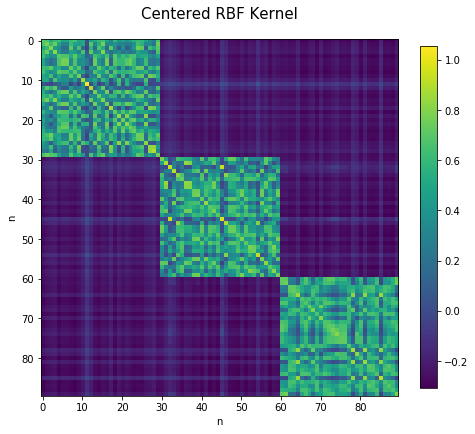

In [4]:
# Calculate the PC for the kernel matrix
# Center the kernel matrix
#As done by Konstantin
row_avg = np.mean(kernel_matrix, axis=1)
col_avg = np.mean(kernel_matrix, axis=0)
mat_avg = np.mean(kernel_matrix)

np.testing.assert_almost_equal(row_avg, col_avg)
centered_kernel = kernel_matrix - row_avg.reshape(90, 1) - \
                  col_avg.reshape(1, 90) + mat_avg

plt.figure(figsize=(8, 7))
im = plt.imshow(centered_kernel)
plt.xlabel('n')
plt.ylabel('n')
plt.title('Centered RBF Kernel', size=15, pad=20)
plt.colorbar(im, shrink=0.9);